# K-fold Practice

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, matthews_corrcoef,f1_score
%matplotlib inline

In [2]:
train = pd.read_csv('titanic_train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


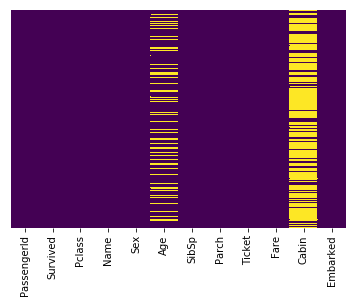

In [4]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


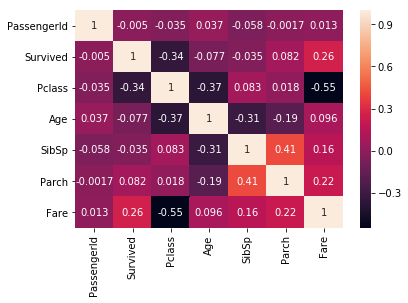

In [6]:
sns.heatmap(train.corr(),annot=True)

In [7]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [8]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

In [9]:
train.drop('Cabin',axis=1,inplace=True)

In [10]:
train.dropna(inplace=True)

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [12]:
sex = pd.get_dummies(train['Sex'], drop_first=True)
embark = pd.get_dummies(train['Embarked'], drop_first=True)
pclass = pd.get_dummies(train['Pclass'], drop_first=True)
sibsp = pd.get_dummies(train['SibSp'])

In [13]:
train.drop(['Sex', 'Parch','Embarked','Name','Ticket', 'PassengerId', 'Pclass', 'SibSp'],axis=1,inplace=True)

In [14]:
train = pd.concat([train,sex,embark, pclass, sibsp],axis=1)

In [15]:
train.head()

,Survived,Age,Fare,male,Q,S,2,3,0,1,2,3,4,5,8
0,0,22.0,7.2500,1,0,1,0,1,0,1,0,0,0,0,0
1,1,38.0,71.2833,0,0,0,0,0,0,1,0,0,0,0,0
2,1,26.0,7.9250,0,0,1,0,1,1,0,0,0,0,0,0
3,1,35.0,53.1000,0,0,1,0,0,0,1,0,0,0,0,0
4,0,35.0,8.0500,1,0,1,0,1,1,0,0,0,0,0,0


In [16]:
data = train.drop('Survived',axis=1);
target = train['Survived'];
# target = target.reset_index().drop('index', axis=1)
# data = data.reset_index().drop('index',axis=1);

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()
scaler.fit(data[['Age','Fare']])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [19]:
scaled_data = scaler.transform(data[['Age','Fare']])

In [20]:
scaled_data

array([[-0.53167023, -0.50023975],
       [ 0.68023223,  0.78894661],
       [-0.22869462, -0.48664993],
       ...,
       [-0.38018243, -0.17408416],
       [-0.22869462, -0.0422126 ],
       [ 0.22576881, -0.49017322]])

In [21]:
from sklearn.decomposition import PCA

In [22]:
pca = PCA(n_components=1)
spca = PCA(n_components=1)

In [23]:
pca.fit(data[['Age','Fare']])
spca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [24]:
x_pca = pca.transform(data[['Age','Fare']])
sx_pca = spca.transform(scaled_data)

In [25]:
dfx_pca = pd.DataFrame(x_pca, columns=['Feature 1'])
dfsx_pca = pd.DataFrame(sx_pca, columns=['Feature 1'])
dfx_pca = pd.concat([dfx_pca,data.reset_index().drop(['index','Age','Fare'], axis=1)], axis=1)
dfsx_pca = pd.concat([dfsx_pca,data.reset_index().drop(['index','Age','Fare'], axis=1)], axis=1)
print(dfx_pca.head())
print(dfsx_pca.head())

   Feature 1  male  Q  S  2  3  0  1  2  3  4  5  8
0 -25.074227     1  0  1  0  1  0  1  0  0  0  0  0
1  39.473337     0  0  0  0  0  0  1  0  0  0  0  0
2 -24.261519     0  0  1  0  1  1  0  0  0  0  0  0
3  21.197296     0  0  1  0  0  0  1  0  0  0  0  0
4 -23.825843     1  0  1  0  1  1  0  0  0  0  0  0
   Feature 1  male  Q  S  2  3  0  1  2  3  4  5  8
0  -0.729671     1  0  1  0  1  0  1  0  0  0  0  0
1   1.038866     0  0  0  0  0  0  1  0  0  0  0  0
2  -0.505825     0  0  1  0  1  1  0  0  0  0  0  0
3   0.619328     0  0  1  0  0  0  1  0  0  0  0  0
4  -0.022014     1  0  1  0  1  1  0  0  0  0  0  0


In [26]:
# plt.figure(figsize=(8,6))
# plt.scatter(dfx_pca['Feature 1'],dfx_pca['Feature 2'],c=target,cmap='plasma')
# plt.xlabel('First Feature')
# plt.ylabel('Second Feature')

In [27]:
# plt.figure(figsize=(8,6))
# plt.scatter(dfsx_pca['Feature 1'],dfsx_pca['Feature 2'],c=target,cmap='plasma')
# plt.xlabel('First Feature')
# plt.ylabel('Second Feature')

In [28]:
def calc_train_error(X_train, y_train, model):
#     '''returns in-sample error for already fit model.'''
    predictions = model.predict(X_train)
    matt = matthews_corrcoef(y_train, predictions)
    f1 = f1_score(y_train, predictions, average='macro')
    report = classification_report(y_train, predictions)
    return [matt,f1,report]
    
def calc_validation_error(X_test, y_test, model):
#     '''returns out-of-sample error for already fit model.'''
    predictions = model.predict(X_test)
    matt = matthews_corrcoef(y_test, predictions)
    f1 = f1_score(y_test, predictions, average='macro')
    report = classification_report(y_test, predictions)
    return [matt,f1,report]
    
def calc_metrics(X_train, y_train, X_test, y_test, model):
#     '''fits model and returns the RMSE for in-sample error and out-of-sample error'''
    model.fit(X_train, y_train)
    train_error = calc_train_error(X_train, y_train, model)
    validation_error = calc_validation_error(X_test, y_test, model)
    return train_error, validation_error

In [29]:
from sklearn.model_selection import KFold

K = 10
kf = KFold(n_splits=K, shuffle=True, random_state=42)

In [30]:
train_errors = []
validation_errors = []
for train_index, val_index in kf.split(data, target):
    
    # split data
    X_train, X_val = data.iloc[train_index], data.iloc[val_index]
    y_train, y_val = target.iloc[train_index], target.iloc[val_index]

    # instantiate model
    logmodel = LogisticRegression()

    #calculate errors
    train_error, val_error = calc_metrics(X_train, y_train, X_val, y_val, logmodel)

    # append to appropriate list
    train_errors.append(train_error)
    validation_errors.append(val_error)

In [31]:
train_errors = np.array(train_errors)
validation_errors = np.array(validation_errors)

In [32]:
# train_errors[:,0].astype(float)

In [44]:
print('Matt Train : ' + str(np.mean(train_errors[:,0].astype(float))), 
      'F1 Train : ' + str(np.mean(train_errors[:,1].astype(float))))
print('Matt Val : ' + str(np.mean(validation_errors[:,0].astype(float))), 
      'F1 Val : ' + str(np.mean(validation_errors[:,1].astype(float))))

Matt Train : 0.5700342784171853 F1 Train : 0.7836281672914772
Matt Val : 0.5653489282450228 F1 Val : 0.7798019919906967


In [34]:
for rep in validation_errors[:,2] :
    print(rep)

             precision    recall  f1-score   support

          0       0.90      0.90      0.90        58
          1       0.81      0.81      0.81        31

avg / total       0.87      0.87      0.87        89

             precision    recall  f1-score   support

          0       0.80      0.80      0.80        51
          1       0.74      0.74      0.74        38

avg / total       0.78      0.78      0.78        89

             precision    recall  f1-score   support

          0       0.81      0.93      0.86        58
          1       0.82      0.58      0.68        31

avg / total       0.81      0.81      0.80        89

             precision    recall  f1-score   support

          0       0.79      0.89      0.84        47
          1       0.86      0.74      0.79        42

avg / total       0.82      0.82      0.82        89

             precision    recall  f1-score   support

          0       0.88      0.90      0.89        51
          1       0.86      0.84 

In [35]:
for f1 in validation_errors[:,1] :
    print(round(float(f1),2))

0.85
0.77
0.77
0.82
0.87
0.77
0.78
0.81
0.76
0.74


In [36]:
train_errors = []
validation_errors = []
for train_index, val_index in kf.split(dfx_pca, target):

    # split data
    X_train, X_val = dfx_pca.iloc[train_index], dfx_pca.iloc[val_index]
    y_train, y_val = target.iloc[train_index], target.iloc[val_index]

    # instantiate model
    logmodel = LogisticRegression()

    #calculate errors
    train_error, val_error = calc_metrics(X_train, y_train, X_val, y_val, logmodel)

    # append to appropriate list
    train_errors.append(train_error)
    validation_errors.append(val_error)

In [37]:
train_errors = np.array(train_errors)
validation_errors = np.array(validation_errors)

In [38]:
for rep in validation_errors[:,2] :
    print(rep)

             precision    recall  f1-score   support

          0       0.89      0.84      0.87        58
          1       0.74      0.81      0.77        31

avg / total       0.84      0.83      0.83        89

             precision    recall  f1-score   support

          0       0.79      0.80      0.80        51
          1       0.73      0.71      0.72        38

avg / total       0.76      0.76      0.76        89

             precision    recall  f1-score   support

          0       0.82      0.93      0.87        58
          1       0.83      0.61      0.70        31

avg / total       0.82      0.82      0.81        89

             precision    recall  f1-score   support

          0       0.75      0.87      0.80        47
          1       0.82      0.67      0.74        42

avg / total       0.78      0.78      0.77        89

             precision    recall  f1-score   support

          0       0.84      0.90      0.87        51
          1       0.85      0.76 

In [39]:
for f1 in validation_errors[:,1] :
    print(round(float(f1),2))

0.82
0.76
0.79
0.77
0.84
0.74
0.76
0.78
0.75
0.73


In [40]:
train_errors = []
validation_errors = []
for train_index, val_index in kf.split(dfsx_pca, target):

    # split data
    X_train, X_val = dfsx_pca.iloc[train_index], dfsx_pca.iloc[val_index]
    y_train, y_val = target.iloc[train_index], target.iloc[val_index]

    # instantiate model
    logmodel = LogisticRegression()

    #calculate errors
    train_error, val_error = calc_metrics(X_train, y_train, X_val, y_val, logmodel)

    # append to appropriate list
    train_errors.append(train_error)
    validation_errors.append(val_error)

In [41]:
train_errors = np.array(train_errors)
validation_errors = np.array(validation_errors)

In [42]:
for rep in validation_errors[:,2] :
    print(rep)

             precision    recall  f1-score   support

          0       0.89      0.83      0.86        58
          1       0.71      0.81      0.76        31

avg / total       0.83      0.82      0.82        89

             precision    recall  f1-score   support

          0       0.80      0.78      0.79        51
          1       0.72      0.74      0.73        38

avg / total       0.76      0.76      0.76        89

             precision    recall  f1-score   support

          0       0.83      0.93      0.88        58
          1       0.83      0.65      0.73        31

avg / total       0.83      0.83      0.83        89

             precision    recall  f1-score   support

          0       0.78      0.85      0.82        47
          1       0.82      0.74      0.78        42

avg / total       0.80      0.80      0.80        89

             precision    recall  f1-score   support

          0       0.84      0.90      0.87        51
          1       0.85      0.76 

In [43]:
for f1 in validation_errors[:,1] :
    print(round(float(f1),2))

0.81
0.76
0.8
0.8
0.84
0.77
0.77
0.78
0.75
0.73
